# Financial Planning Tool

This notebook contains 2 financial analysis applications.

Emergency Planner: Users will be able to visualize their current savings & determine if they have enough savings to cover an emergency.

Retirement Planner: Users can forecast the performance of their retirement portfolio in 30 years or 10 years via a Monte Carlo simulation.

In [1]:
# Libraries required to execute both applications
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# allows for usage of env file which contains appropriate keys to access Alpaca API
load_dotenv()

True

## App 1: Financial Planner for Emergencies

### Establish value of the Cryptocurrency Wallet

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


In [5]:
# This is where we are pulling the crypto values from
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Access crypto values through Python requests library
btc_response = requests.get(btc_url).json()

# Using the json.dumps function with indentation and sort parameters to improve reability
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19080643,
            "id": 1,
            "last_updated": 1656539021,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 387875400948,
                    "percent_change_1h": 0.909053801475202,
                    "percent_change_24h": -0.0775426742452227,
                    "percent_change_7d": -1.6790957255295,
                    "percentage_change_1h": 0.909053801475202,
                    "percentage_change_24h": -0.0775426742452227,
                    "percentage_change_7d": -1.6790957255295,
                    "price": 20353.0,
                    "volume_24h": 20650239012
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19080643,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Replicating work done to get bitcoin data to pull ethereum data
eth_response = requests.get(eth_url).json()

print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 121346909,
            "id": 1027,
            "last_updated": 1656539092,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 135609805064,
                    "percent_change_1h": 0.892913612668545,
                    "percent_change_24h": -4.14903412813951,
                    "percent_change_7d": -0.530447933214091,
                    "percentage_change_1h": 0.892913612668545,
                    "percentage_change_24h": -4.14903412813951,
                    "percentage_change_7d": -0.530447933214091,
                    "price": 1118.6,
                    "volume_24h": 14374521669
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 121346909,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

#### Determine Crypto Coin Value: this will change each time that the program is run.

In [8]:
# Data pulled from above request for BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

print(f"The price for BTC is ${btc_price:.2f}")


The price for BTC is $20353.00


In [9]:
# Daa pulled from above request for ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for ETH is ${eth_price:.2f}")


The price for ETH is $1118.60


### Calculate current value of crypto holdings based on real-time data pulls

In [10]:
# Calculate current value of the BTC holding 
btc_value = btc_response['data']['1']['quotes']['USD']['price'] * btc_coins

print(f"The current value of your {btc_coins} Bitcoin is ${btc_value:.2f}")


The current value of your 1.2 Bitcoin is $24423.60


In [11]:
# Calculate current value of the ETH holding 
eth_value = eth_response['data']['1027']['quotes']['USD']['price'] * eth_coins

print(f"The current value of your {eth_coins} Ethereum is ${eth_value:.2f}")


The current value of your 5.3 Ethereum is $5928.58


In [12]:
# Determine total value of crypto holdings
total_crypto_wallet = btc_value + eth_value

print(f"The total value of your crypto wallet is ${total_crypto_wallet:.2f}")


The total value of your crypto wallet is $30352.18


### Determine value of stock & bond holding

Pull real-time data from the Alpaca to determine current price of key funds (SPY & AGG)


In [13]:
# Current amount of shares held 
spy_shares = 110
agg_shares = 200


In [14]:
# Establish connection to Alpaca API
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)



In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers =["SPY", "AGG"]

timeframe = "1Day"

today = pd.Timestamp("2022-06-27", tz="America/New_York").isoformat()

# Note: Date set to last business day prior to starting project
start = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()



In [16]:
# Pull data from Alpaca, organize and concatenate data to make it workable
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

df_portfolio = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Verfiy data has been pulle as defined
df_portfolio.head()



SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-06-24 04:00:00+00:00  381.43  390.09  381.365  390.08  97628636   

                                                     AGG                   \
                          trade_count       vwap    open    high      low   
timestamp                                                                   
2022-06-24 04:00:00+00:00      628275  386.72431  101.11  101.47  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

In [17]:
# Retrieve & verify AGG closing price 
agg_close_price = float(df_portfolio["AGG"]['close'])

print(f"The AGG stock closing price is ${agg_close_price}")



The AGG stock closing price is $101.05


In [18]:
# Retrieve & verify SPY closing price
spy_close_price = float(df_portfolio["SPY"]['close'])

print(f"The SPY stock closing price is ${spy_close_price}")


The SPY stock closing price is $390.08


In [19]:
# Calculating the value of the bond portfolio (AGG)
agg_value = agg_close_price * agg_shares

print(f"The current value of AGG shares is ${agg_value:.2f}")

The current value of AGG shares is $20210.00


In [20]:
# Calculating the value of the stock portfolio (SPY)
spy_value = spy_close_price * spy_shares

print(f"The current value of SPY shares is ${spy_value:.2f}")

The current value of SPY shares is $42908.80


In [21]:
# Calculating the combined value of the bond and stock portfolios
total_stocks_bonds = spy_value + agg_value 

print(f"The current value of stocks & bonds portfolio (SPY & AGG) is ${total_stocks_bonds:.2f}")


The current value of stocks & bonds portfolio (SPY & AGG) is $63118.80


In [22]:
# Calculating the combined value of the current portfolio (stocks, bonds, & crypto)
total_portfolio = total_stocks_bonds + total_crypto_wallet

print(f"The current value of stocks, bonds & crypto portfolio is ${total_portfolio:.2f}")


The current value of stocks, bonds & crypto portfolio is $93470.98


### Evaluating Emergency Fund

Compare the current portfolio to 3 months of earnings to determine if the portfolio can cover 3 months of wages.

In [23]:
# Consolidate financial assets data into a Python list & review
savings_data = [total_crypto_wallet, total_stocks_bonds] 

savings_data
    

[30352.179999999997, 63118.799999999996]

In [24]:
# Create DataFrame and review inputs 
savings_df = pd.DataFrame(savings_data, columns=['Amount'], index=['crypto', 'stock/bond'])

savings_df


,Amount
crypto,30352.18
stock/bond,63118.80


<AxesSubplot:title={'center':'Crypto & Stock/Bond Portfolio'}, ylabel='Amount'>

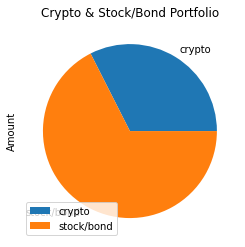

In [25]:
# Display breakdown of assets in portfolio
savings_df.plot.pie(y='Amount', title="Crypto & Stock/Bond Portfolio")

In [26]:
# Calculate necessary emergency fund based on three months of income
emergency_fund_value = monthly_income * 3

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations you have enough money to cover 3 months of income, plus you have ${total_portfolio - emergency_fund_value:.2f} left to invest.")
elif total_portfolio == emergency_fund_value:
    print(f"Great job!  You have secured enough savings to cover three months of your current income")
else:
    print(f"You are off to a good start but you still need to save an additional ${emergency_fund_value - total_portfolio:.2f} in order to meet your savings goal.")

Congratulations you have enough money to cover 3 months of income, plus you have $57470.98 left to invest.


## App 2: Financial Planner for Retirement Using Monte Carlo Simulations

In [28]:
# Build Monte Carlo simulation based on 3 years of historical data 
start_mc = pd.Timestamp("2019-06-01", tz="America/New_York").isoformat()
end_mc = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()

In [29]:
# Retrieve data from Alpaca API, sepearate the data by stock / bond & concatenate the date into one DataFrame
mc_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_mc,
    end = end_mc
).df

SPY = mc_portfolio_df[mc_portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = mc_portfolio_df[mc_portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
                      
mc_portfolio_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# 
display(mc_portfolio_df.head())
display(mc_portfolio_df.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-06-03 04:00:00+00:00  275.30  276.5521  273.09  274.57  96584146   
2019-06-04 04:00:00+00:00  277.11  280.6800  276.62  280.53  77767889   
2019-06-05 04:00:00+00:00  282.34  282.9900  280.32  282.96  71374498   
2019-06-06 04:00:00+00:00  283.29  285.5500  282.57  284.80  69855780   
2019-06-07 04:00:00+00:00  285.95  288.8500  285.74  287.65  74283295   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-06-03 04:00:00+00:00      492872  274.759710  110.26  110.515  110.1725   
2019-06-04 04:00:00+00:00      377640  278.845031  110.28  110.380  110.1300   
2019-06-05 04:00:00+00:00      327592  281.929760  110.36  110.470  110.2300   
2019-06-06 04:00:00+00:00      303395  284.047267  110.34  110.420  110.1600   
2019-06-07 04:00:00+00:00      337830  287.477283  110.64  110.670  110.4500   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-06-03 04:00:00+00:00  110.40  7137903       24829  110.336235  
2019-06-04 04:00:00+00:00  110.30  5131883       17516  110.222673  
2019-06-05 04:00:00+00:00  110.24  3253509       11960  110.281745  
2019-06-06 04:00:00+00:00  110.22  2660352        9748  110.279416  
2019-06-07 04:00:00+00:00  110.53  3697054       12233  110.530069

SPY                                       \
                             open     high      low   close     volume   
timestamp                                                                
2022-06-17 04:00:00+00:00  365.43  369.380  362.170  365.86  109255759   
2022-06-21 04:00:00+00:00  371.90  376.525  371.810  375.07   76966205   
2022-06-22 04:00:00+00:00  370.68  378.720  370.180  374.39   89625876   
2022-06-23 04:00:00+00:00  376.69  378.830  372.890  378.06   78643521   
2022-06-24 04:00:00+00:00  381.43  390.090  381.365  390.08   97628636   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-06-17 04:00:00+00:00      821350  366.263193  100.42  100.5700   99.980   
2022-06-21 04:00:00+00:00      578265  374.376305  100.02  100.2600   99.790   
2022-06-22 04:00:00+00:00      604343  375.146941  100.67  100.9296  100.665   
2022-06-23 04:00:00+00:00      623105  376.219755  101.25  101.7600  101.125   
2022-06-24 04:00:00+00:00      628275  386.724310  101.11  101.4700  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-17 04:00:00+00:00  100.34  9891839       26374  100.372650  
2022-06-21 04:00:00+00:00   99.94  7769462       24356   99.992280  
2022-06-22 04:00:00+00:00  100.79  9430887       30103  100.802688  
2022-06-23 04:00:00+00:00  101.21  7760715       25697  101.363615  
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

In [30]:
# Establish Monte Carlo simulations at 500, and the duration fo the simulation at 30 years
MC_thirtyyear = MCSimulation(
    portfolio_data = mc_portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data.head()


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-06-03 04:00:00+00:00  275.30  276.5521  273.09  274.57  96584146   
2019-06-04 04:00:00+00:00  277.11  280.6800  276.62  280.53  77767889   
2019-06-05 04:00:00+00:00  282.34  282.9900  280.32  282.96  71374498   
2019-06-06 04:00:00+00:00  283.29  285.5500  282.57  284.80  69855780   
2019-06-07 04:00:00+00:00  285.95  288.8500  285.74  287.65  74283295   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-03 04:00:00+00:00      492872  274.759710          NaN  110.26   
2019-06-04 04:00:00+00:00      377640  278.845031     0.021707  110.28   
2019-06-05 04:00:00+00:00      327592  281.929760     0.008662  110.36   
2019-06-06 04:00:00+00:00      303395  284.047267     0.006503  110.34   
2019-06-07 04:00:00+00:00      337830  287.477283     0.010007  110.64   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-06-03 04:00:00+00:00  110.515  110.1725  110.40  7137903       24829   
2019-06-04 04:00:00+00:00  110.380  110.1300  110.30  5131883       17516   
2019-06-05 04:00:00+00:00  110.470  110.2300  110.24  3253509       11960   
2019-06-06 04:00:00+00:00  110.420  110.1600  110.22  2660352        9748   
2019-06-07 04:00:00+00:00  110.670  110.4500  110.53  3697054       12233   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-03 04:00:00+00:00  110.336235          NaN  
2019-06-04 04:00:00+00:00  110.222673    -0.000906  
2019-06-05 04:00:00+00:00  110.281745    -0.000544  
2019-06-06 04:00:00+00:00  110.279416    -0.000181  
2019-06-07 04:00:00+00:00  110.530069     0.002813

In [31]:
# Run the Monte Carlo simulation
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 110.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 120.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 130.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 140.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 150.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 160.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 170.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 180.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 190.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 200.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 210.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 220.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 230.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 240.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 250.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 260.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 270.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 280.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 290.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 300.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 310.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 320.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 330.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 340.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 350.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 360.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 370.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 380.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 390.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 400.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 410.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 420.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 430.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 440.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 450.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 460.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 470.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 480.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 490.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994667,0.994767,1.008225,1.003457,1.005910,0.995578,1.001111,0.998183,0.999767,0.996241,...,0.999892,0.994631,0.997017,1.005481,0.998001,0.999940,1.007948,0.984577,1.010933,0.996349
2,0.998813,0.998143,1.002739,0.995403,1.004741,0.996534,0.996968,1.003374,0.996128,0.996040,...,0.995453,0.985746,1.004247,0.998459,0.987839,1.006428,1.002896,0.984674,1.011890,0.989872
3,1.007221,1.008563,1.000188,0.997741,1.001414,0.994746,0.984903,0.998426,0.992869,0.994878,...,0.996017,0.986038,1.000766,1.000429,0.987078,1.015173,0.992839,0.978661,1.012504,0.991843
4,1.014792,1.005234,1.000922,0.991102,0.995354,0.998395,0.983239,0.996220,0.989399,0.999375,...,0.991436,1.001344,1.000517,0.998556,0.986983,1.014736,0.998281,0.981047,1.009886,0.987523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.554505,2.893758,0.928304,1.448662,1.235556,5.821098,2.439985,2.865902,4.829427,3.174462,...,6.104622,3.482554,3.246033,1.848667,2.235909,2.078482,2.613627,7.588270,1.987835,2.055366
7557,4.572592,2.891093,0.928811,1.456466,1.239443,5.812695,2.420960,2.865442,4.865043,3.167827,...,6.101417,3.507443,3.265413,1.853577,2.236380,2.090774,2.609746,7.554425,2.001984,2.056262
7558,4.577254,2.916630,0.930711,1.454804,1.235914,5.750104,2.433389,2.872615,4.893478,3.145793,...,6.158871,3.494749,3.279527,1.859527,2.233897,2.098312,2.609259,7.647843,2.013903,2.065161
7559,4.580799,2.917655,0.940138,1.451203,1.223047,5.714305,2.460140,2.831122,4.889929,3.137975,...,6.095008,3.483601,3.301878,1.857593,2.251306,2.112953,2.626913,7.705101,2.006567,2.080648


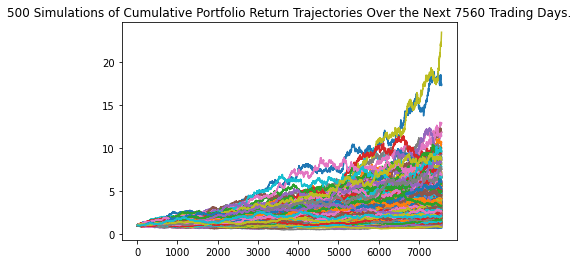

In [32]:
# Creat visualizaton of Monte Carlo results to create a high level review
MC_30_yr_sim_line_plot = MC_thirtyyear.plot_simulation()

#Save for future use if necessary (Note: this was an option step that I decided to take
MC_30_yr_sim_line_plot.get_figure().savefig("MC_30yr_sim_plot.png", bbox_inches="tight")


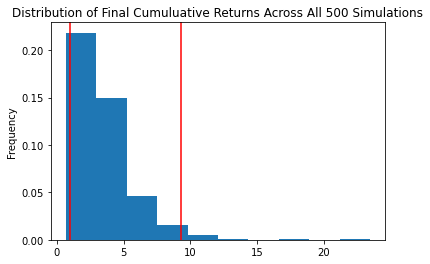

In [33]:
# Visualize the probability distribution 
MC_30_yr_dist_plot = MC_thirtyyear.plot_distribution()

#Save for future use if necessary
MC_30_yr_dist_plot.get_figure().savefig("MC_30yr_dist_plot.png", bbox_inches="tight")


In [34]:
# Generate summary statistics 
MC_30_yr_stats = MC_thirtyyear.summarize_cumulative_return()

print(MC_30_yr_stats)

count           500.000000
mean              3.529433
std               2.305251
min               0.670778
25%               2.062778
50%               2.955505
75%               4.449855
max              23.466250
95% CI Lower      0.999268
95% CI Upper      9.312489
Name: 7560, dtype: float64


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Retirement portfolio analysis

In [35]:
# Current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock portfolio is:  ${spy_value:.2f} and the bond portfolio has a value of: ${agg_value:.2f}")
print(f"This means the total portfolio is worth ${total_stocks_bonds:.2f}") 


The current value of the stock portfolio is:  $42908.80 and the bond portfolio has a value of: $20210.00
This means the total portfolio is worth $63118.80


In [36]:
# Establish range of outcomes for the current portfolio over 30 years
ci_lower_thirty_cumulative_return = total_stocks_bonds * MC_30_yr_stats[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * MC_30_yr_stats[9]

# Print the result of your calculations
print(f"Based on a current portfolio of ${total_stocks_bonds:.2f} we have a 95% confidence your portfolio will be worth between ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f} in 30 years.")


Based on a current portfolio of $63118.80 we have a 95% confidence your portfolio will be worth between $63072.57 and $587793.11 in 30 years.


### Alternative Scenario - 10 Years

In [37]:
# Configure a Monte Carlo simulation to forecast 10 years with a 80% stock / 20% bond mix.  
#Run simulation 500 times
MC_tenyear = MCSimulation(
    portfolio_data = mc_portfolio_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Verify data
MC_tenyear.portfolio_data.head()


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-06-03 04:00:00+00:00  275.30  276.5521  273.09  274.57  96584146   
2019-06-04 04:00:00+00:00  277.11  280.6800  276.62  280.53  77767889   
2019-06-05 04:00:00+00:00  282.34  282.9900  280.32  282.96  71374498   
2019-06-06 04:00:00+00:00  283.29  285.5500  282.57  284.80  69855780   
2019-06-07 04:00:00+00:00  285.95  288.8500  285.74  287.65  74283295   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-03 04:00:00+00:00      492872  274.759710          NaN  110.26   
2019-06-04 04:00:00+00:00      377640  278.845031     0.021707  110.28   
2019-06-05 04:00:00+00:00      327592  281.929760     0.008662  110.36   
2019-06-06 04:00:00+00:00      303395  284.047267     0.006503  110.34   
2019-06-07 04:00:00+00:00      337830  287.477283     0.010007  110.64   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-06-03 04:00:00+00:00  110.515  110.1725  110.40  7137903       24829   
2019-06-04 04:00:00+00:00  110.380  110.1300  110.30  5131883       17516   
2019-06-05 04:00:00+00:00  110.470  110.2300  110.24  3253509       11960   
2019-06-06 04:00:00+00:00  110.420  110.1600  110.22  2660352        9748   
2019-06-07 04:00:00+00:00  110.670  110.4500  110.53  3697054       12233   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-03 04:00:00+00:00  110.336235          NaN  
2019-06-04 04:00:00+00:00  110.222673    -0.000906  
2019-06-05 04:00:00+00:00  110.281745    -0.000544  
2019-06-06 04:00:00+00:00  110.279416    -0.000181  
2019-06-07 04:00:00+00:00  110.530069     0.002813

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 110.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 120.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 130.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 140.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 150.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 160.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 170.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 180.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 190.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 200.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 210.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 220.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 230.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 240.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 250.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 260.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 270.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 280.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 290.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 300.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 310.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 320.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 330.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 340.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 350.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 360.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 370.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 380.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 390.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 400.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 410.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 420.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 430.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 440.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 450.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 460.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 470.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 480.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

Running Monte Carlo simulation number 490.


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCFor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983194,1.008708,0.995402,0.982372,0.998917,0.980613,0.988570,0.988196,1.001051,0.995060,...,0.997984,0.997959,0.997034,1.000149,1.018954,1.007721,0.995825,0.996209,0.994629,1.003970
2,0.984109,1.012203,1.000475,0.979176,0.996580,0.960397,1.004493,0.981785,1.003323,0.998808,...,0.990934,0.991037,0.988510,1.004070,1.012745,1.003099,0.998664,1.010510,0.992746,1.009179
3,0.965888,0.994836,0.989881,0.977973,0.992194,0.973175,1.012812,1.003216,0.983696,1.006716,...,0.993525,0.998495,0.973505,1.000788,1.000691,0.985797,1.007386,1.013150,0.994371,1.036037
4,0.978172,0.995478,0.999839,0.965126,0.991481,0.972153,1.010740,1.030278,0.984534,1.004591,...,0.971771,0.978841,0.967869,0.996751,0.995438,0.990190,1.016839,1.006574,1.010077,1.038336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.431399,1.961269,4.397210,2.791615,5.283913,5.961677,2.098174,1.494356,1.535756,2.204696,...,3.051365,5.724564,5.484302,1.088359,4.501092,5.275752,3.849860,3.977047,1.623473,2.970838
2517,4.452639,1.962570,4.436024,2.781701,5.336614,6.070233,2.113815,1.490374,1.564637,2.216440,...,3.063881,5.625379,5.512619,1.072187,4.509115,5.218805,3.856292,4.009531,1.650160,3.005697
2518,4.387648,1.945847,4.447875,2.788709,5.292745,5.970102,2.068243,1.498180,1.553594,2.290319,...,3.098589,5.591011,5.426720,1.071565,4.529265,5.280011,3.876789,3.949577,1.662033,2.973743
2519,4.400714,1.947437,4.408019,2.766742,5.318559,5.956543,2.107521,1.489077,1.557066,2.265303,...,3.099631,5.722189,5.432475,1.079392,4.525958,5.367169,3.888881,3.908318,1.676356,2.963621


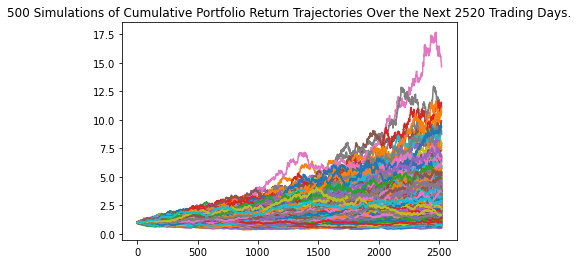

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yr_sim_line_plot = MC_tenyear.plot_simulation()

#Save for future use if necessary
MC_10_yr_sim_line_plot.get_figure().savefig("MC_10yr_sim_plot.png", bbox_inches="tight")


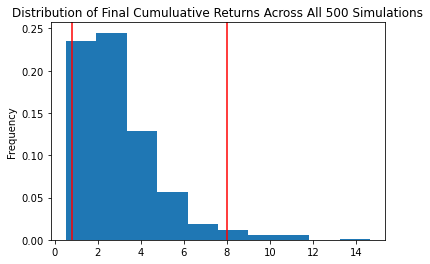

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yr_dist_plot = MC_tenyear.plot_distribution()

#Save for future use if necessary
MC_10_yr_dist_plot.get_figure().savefig("MC_10yr_dist_plot.png", bbox_inches="tight")


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_yr_stats = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_10_yr_stats)

count           500.000000
mean              2.992812
std               1.909015
min               0.520692
25%               1.678758
50%               2.573061
75%               3.833623
max              14.643996
95% CI Lower      0.796876
95% CI Upper      7.993675
Name: 2520, dtype: float64


C:\Users\jonm5\Documents\Challenge Assignments\Financial-Health-Checker\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock portfolio is:  ${spy_value:.2f} and the bond portfolio has a value of: ${agg_value:.2f}")
print(f"This means the total portfolio is worth ${total_stocks_bonds:.2f}")


The current value of the stock portfolio is:  $42908.80 and the bond portfolio has a value of: $20210.00
This means the total portfolio is worth $63118.80


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = total_stocks_bonds * MC_10_yr_stats[8]
ci_upper_ten_cumulative_return = total_stocks_bonds * MC_10_yr_stats[9]

# Print the result of your calculations
print(f"Based on a current portfolio of ${total_stocks_bonds:.2f} we have a 95% confidence your portfolio will be worth between ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f} in 10 years.")



Based on a current portfolio of $63118.80 we have a 95% confidence your portfolio will be worth between $50297.86 and $504551.16 in 10 years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?